<h2>Variables to consider for building an education model in India that explains state of education in India at Elementary
, Secondary and Higher Education.</h2>

<p>For this problem I used <a href='https://data.gov.in/catalog/major-education-statistics#web_catalog_tabs_block_10'> this</a> dataset from <a href='http://data.gov.in'> this</a> site. which captures the state of education in various states.

First I tried to analyze the relationships of variables with literacy rate, then analyzed five number summary and explored the bar plots of various variables.
</p>

In [52]:
# link to the dataset - https://data.gov.in/catalog/major-education-statistics#web_catalog_tabs_block_10
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
education = pd.read_csv('./data/education.csv', index_col='State'); education.head()

,Population in (Cr) of Total Census 2001,Population in (Cr) of 6-14 age 2004,Literacy Rate,Gross Enrollment Ratio Classes ( I-VIII),Drop-out Classes( I-X),Pupil Teacher Ratio,Pupil Teacher Ratio Upper Primary,Elementary School per lakh population,Sec/Hr.Sec Schools per lakh population,Tenth Plan Sarva Siksha Abhiyan Expenditure ( Rs cr),Tenth Plan Sarva Siksha Abhiyan Expenditure as percentage of Total,Tenth Plan Sarva Siksha Abhiyan Expenditure - Per capita 6-14 age,Lakh of Population per Institution (University),Lakh of Population per Institution (College),Lakh of Population per Institution (Technical)
State,,,,,,,,,,,,,,,
Andhra Padesh,7.62,1.30,60.5,86.99,63.69,33,31,99,22,1806.75,5.09,1387,31.6,0.59,1.97
Arunachal Pradesh,0.11,0.02,54.3,106.70,70.79,34,30,163,19,187.30,0.53,8179,11.4,1.14,5.70
Assam,2.67,0.53,63.3,91.92,74.96,42,16,137,19,1165.14,3.28,2186,46.5,0.88,25.34
Bihar,8.30,1.88,47.0,65.16,83.06,104,75,57,4,2479.49,6.99,1319,46.2,1.18,43.87
Chhattisgarh,2.08,0.41,64.7,112.63,0.00,48,46,203,12,1439.83,4.06,3513,43.8,1.03,18.25


In [3]:
def modify_columns(columns):
    """
    Modifies the columns of a dataframe
    1. lowercase the column names
    2. remove spaces and other punctuation with underscore
    """
    new_col = []
    regex = re.compile('[%s]' % re.escape(string.punctuation))

    for col in columns:
        col = col.lower()
        col = regex.sub('', col)
        col = col.replace(' ', '_')
        new_col.append(col)
    
    return new_col

In [4]:
education.columns = modify_columns(education.columns)

In [5]:
education.head()

,population_in_cr_of_total_census_2001,population_in_cr_of_614_age_2004,literacy_rate,gross_enrollment_ratio__classes__iviii,dropout_classes_ix,pupil_teacher_ratio,pupil_teacher_ratio_upper_primary,elementary_school_per_lakh_population,sechrsec_schools_per_lakh_population,tenth_plan_sarva_siksha_abhiyan_expenditure__rs_cr,tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total,tenth_plan_sarva_siksha_abhiyan_expenditure__per_capita_614_age,lakh_of_population_per_institution_university,lakh_of_population_per_institution_college,lakh_of_population_per_institution_technical
State,,,,,,,,,,,,,,,
Andhra Padesh,7.62,1.30,60.5,86.99,63.69,33,31,99,22,1806.75,5.09,1387,31.6,0.59,1.97
Arunachal Pradesh,0.11,0.02,54.3,106.70,70.79,34,30,163,19,187.30,0.53,8179,11.4,1.14,5.70
Assam,2.67,0.53,63.3,91.92,74.96,42,16,137,19,1165.14,3.28,2186,46.5,0.88,25.34
Bihar,8.30,1.88,47.0,65.16,83.06,104,75,57,4,2479.49,6.99,1319,46.2,1.18,43.87
Chhattisgarh,2.08,0.41,64.7,112.63,0.00,48,46,203,12,1439.83,4.06,3513,43.8,1.03,18.25


In [6]:
education.columns

Index([u'population_in_cr_of_total_census_2001', u'population_in_cr_of_614_age_2004', u'literacy_rate', u'gross_enrollment_ratio__classes__iviii', u'dropout_classes_ix', u'pupil_teacher_ratio', u'pupil_teacher_ratio_upper_primary', u'elementary_school_per_lakh_population', u'sechrsec_schools_per_lakh_population', u'tenth_plan_sarva_siksha_abhiyan_expenditure__rs_cr', u'tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total', u'tenth_plan_sarva_siksha_abhiyan_expenditure__per_capita_614_age', u'lakh_of_population_per_institution_university', u'lakh_of_population_per_institution_college', u'lakh_of_population_per_institution_technical'], dtype='object')

In [7]:
education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Andhra Padesh to India
Data columns (total 15 columns):
population_in_cr_of_total_census_2001                                 36 non-null float64
population_in_cr_of_614_age_2004                                      36 non-null float64
literacy_rate                                                         36 non-null float64
gross_enrollment_ratio__classes__iviii                                36 non-null float64
dropout_classes_ix                                                    36 non-null float64
pupil_teacher_ratio                                                   36 non-null int64
pupil_teacher_ratio_upper_primary                                     36 non-null int64
elementary_school_per_lakh_population                                 36 non-null int64
sechrsec_schools_per_lakh_population                                  36 non-null int64
tenth_plan_sarva_siksha_abhiyan_expenditure__rs_cr                    36 non-null flo

In [28]:
education = education[education.index != 'India']

In [30]:
education.corr()

,population_in_cr_of_total_census_2001,population_in_cr_of_614_age_2004,literacy_rate,gross_enrollment_ratio__classes__iviii,dropout_classes_ix,pupil_teacher_ratio,pupil_teacher_ratio_upper_primary,elementary_school_per_lakh_population,sechrsec_schools_per_lakh_population,tenth_plan_sarva_siksha_abhiyan_expenditure__rs_cr,tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total,tenth_plan_sarva_siksha_abhiyan_expenditure__per_capita_614_age,lakh_of_population_per_institution_university,lakh_of_population_per_institution_college,lakh_of_population_per_institution_technical
population_in_cr_of_total_census_2001,1.000000,0.987111,-0.372316,-0.196727,0.182637,0.411092,0.503964,-0.158400,-0.412005,0.929274,0.929270,-0.185130,0.575950,0.047357,0.193477
population_in_cr_of_614_age_2004,0.987111,1.000000,-0.422380,-0.222356,0.181604,0.465716,0.502776,-0.128124,-0.421943,0.956676,0.956682,-0.162286,0.588971,0.059866,0.268052
literacy_rate,-0.372316,-0.422380,1.000000,0.174217,-0.387617,-0.650930,-0.538386,-0.245996,0.448772,-0.460635,-0.460713,-0.089179,-0.433269,-0.064861,-0.545601
gross_enrollment_ratio__classes__iviii,-0.196727,-0.222356,0.174217,1.000000,0.057766,-0.267091,-0.172881,0.421645,0.413322,-0.144686,-0.144782,0.221161,-0.269692,-0.184145,-0.257997
dropout_classes_ix,0.182637,0.181604,-0.387617,0.057766,1.000000,0.136032,-0.013423,0.164558,0.063114,0.125409,0.125297,0.127700,0.078025,-0.053027,0.212412
pupil_teacher_ratio,0.411092,0.465716,-0.650930,-0.267091,0.136032,1.000000,0.775521,-0.150553,-0.622285,0.434476,0.434542,-0.162086,0.619597,0.290494,0.711721
pupil_teacher_ratio_upper_primary,0.503964,0.502776,-0.538386,-0.172881,-0.013423,0.775521,1.000000,-0.232387,-0.589617,0.448400,0.448444,-0.178898,0.455998,0.171218,0.416094
elementary_school_per_lakh_population,-0.158400,-0.128124,-0.245996,0.421645,0.164558,-0.150553,-0.232387,1.000000,0.540372,0.012774,0.012914,0.606914,-0.098285,-0.381759,0.214756
sechrsec_schools_per_lakh_population,-0.412005,-0.421943,0.448772,0.413322,0.063114,-0.622285,-0.589617,0.540372,1.000000,-0.398201,-0.398192,0.515902,-0.475736,-0.456823,-0.259105
tenth_plan_sarva_siksha_abhiyan_expenditure__rs_cr,0.929274,0.956676,-0.460635,-0.144686,0.125409,0.434476,0.448400,0.012774,-0.398201,1.000000,1.000000,-0.062891,0.578514,0.034034,0.246186


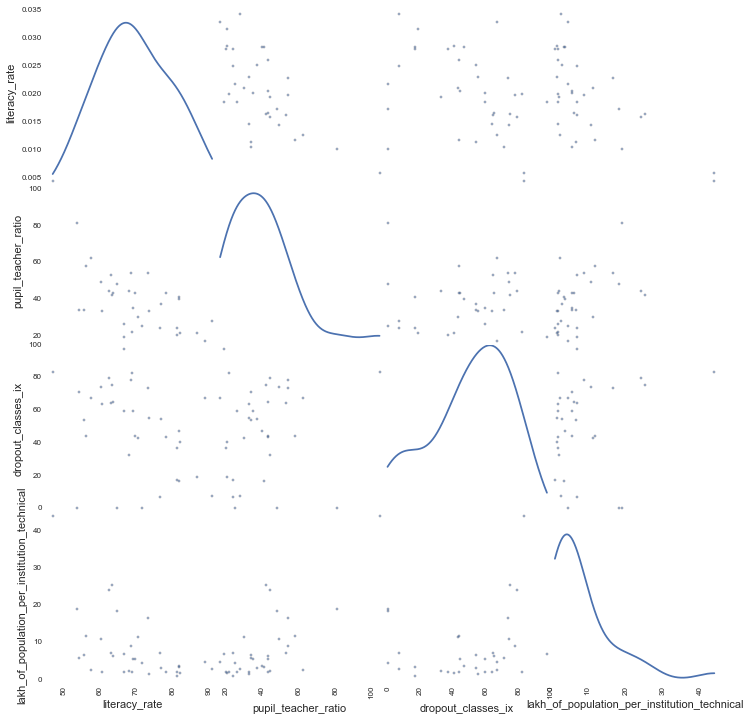

In [31]:
from pandas.tools.plotting import scatter_matrix

# lets plot the relationship among literacy rate,
# pupil teacher ratio, gross enrollment ratio

df = education[['literacy_rate', 'pupil_teacher_ratio', 'dropout_classes_ix',
               'lakh_of_population_per_institution_technical']]
scatter_matrix(df, alpha=.5, figsize=(12, 12), diagonal='kde');

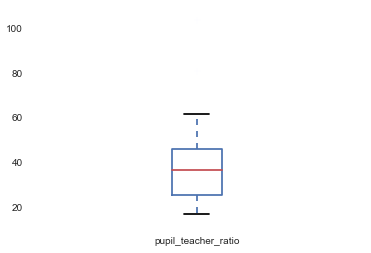

In [32]:
# lets look into this variables in detail
education.boxplot(column='pupil_teacher_ratio');

In [33]:
education['pupil_teacher_ratio'].describe()

count     35.000000
mean      39.600000
std       18.106223
min       17.000000
25%       25.500000
50%       37.000000
75%       46.000000
max      104.000000
Name: pupil_teacher_ratio, dtype: float64

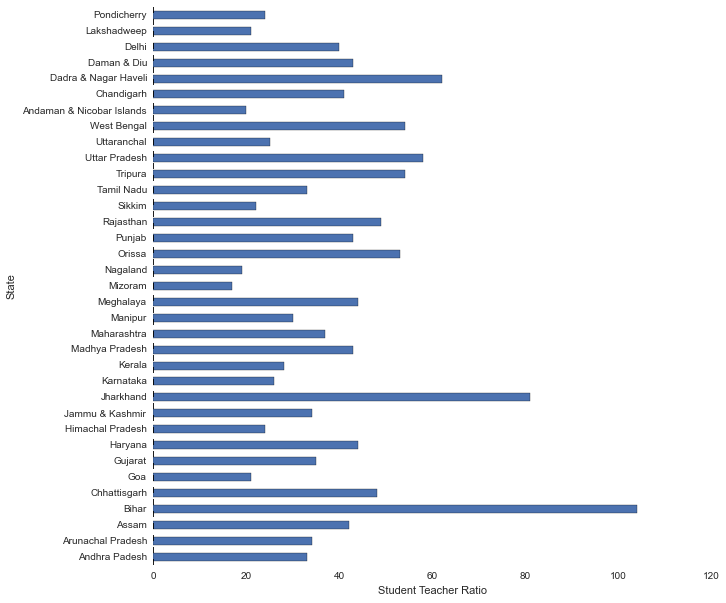

In [55]:
education.pupil_teacher_ratio.plot(kind='barh', figsize=(10, 10));
plt.xlabel('Student Teacher Ratio');

<h3>In India, mean pupil to teacher ratio is 1 : 40.</h3>

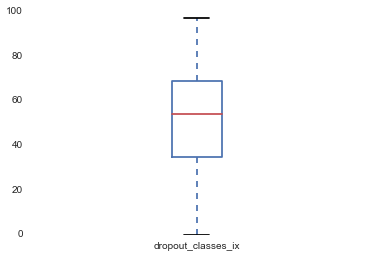

In [35]:
education.boxplot(column='dropout_classes_ix');

In [36]:
# it has one negative value for dropout rate for classes I-X
# lets first take its positive value
education['dropout_classes_ix'] = education['dropout_classes_ix'].map(lambda x: abs(x))

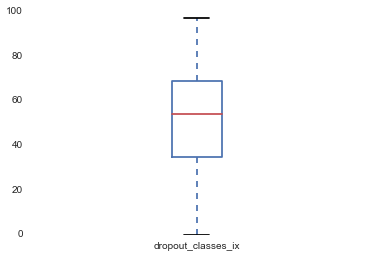

In [37]:
education.boxplot(column='dropout_classes_ix');

In [38]:
education['dropout_classes_ix'].describe()

count    35.000000
mean     49.123714
std      26.937992
min       0.000000
25%      34.725000
50%      54.160000
75%      68.925000
max      97.290000
Name: dropout_classes_ix, dtype: float64

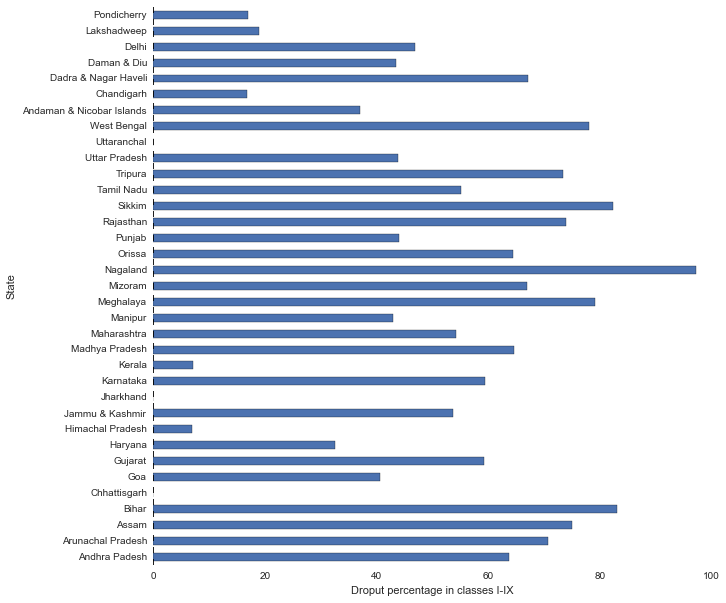

In [54]:
education.dropout_classes_ix.plot(kind='barh', figsize=(10, 10));
plt.xlabel('Droput percentage in classes I-IX');

Technical Institutions
===========

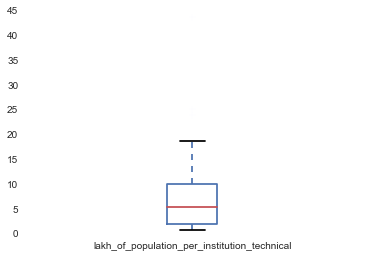

In [40]:
education.boxplot(column='lakh_of_population_per_institution_technical');

In [41]:
education['lakh_of_population_per_institution_technical'].describe()

count    34.000000
mean      8.239412
std       9.049870
min       1.010000
25%       2.247500
50%       5.535000
75%      10.247500
max      43.870000
Name: lakh_of_population_per_institution_technical, dtype: float64

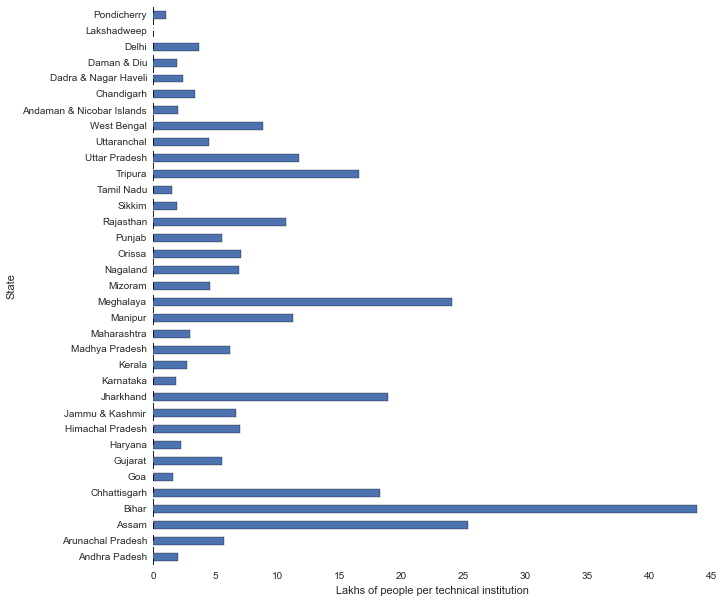

In [56]:
education.lakh_of_population_per_institution_technical.plot(kind='barh', figsize=(10, 10));
plt.xlabel('Lakhs of people per technical institution');

<h3>On average there are about 8.3 lakh people per technical institution in India.</h3>

Elementary Level
========

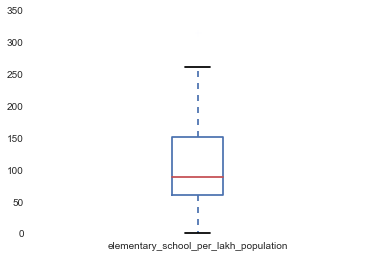

In [57]:
education.boxplot(column='elementary_school_per_lakh_population');

In [58]:
education.elementary_school_per_lakh_population.describe()

count     35.000000
mean     110.628571
std       72.173437
min        3.000000
25%       63.000000
50%       91.000000
75%      154.000000
max      317.000000
Name: elementary_school_per_lakh_population, dtype: float64

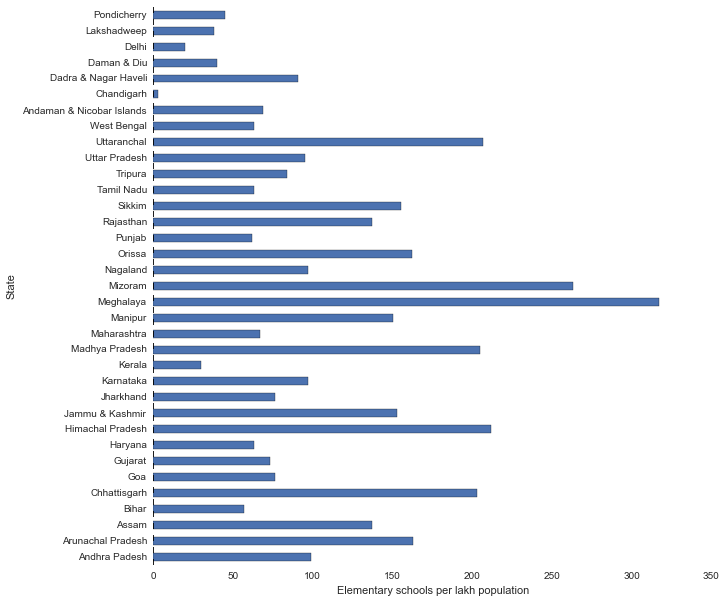

In [59]:
education.elementary_school_per_lakh_population.plot(kind='barh', figsize=(10, 10));
plt.xlabel('Elementary schools per lakh population');

<h3>On average there are about 111 elementary schools per lakh population.</h3>

Senior Secondary Level
===========

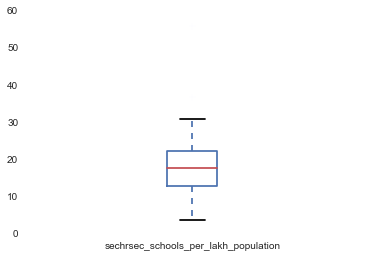

In [60]:
education.boxplot(column='sechrsec_schools_per_lakh_population');

In [61]:
education.sechrsec_schools_per_lakh_population.describe()

count    35.000000
mean     19.028571
std       9.960173
min       4.000000
25%      13.000000
50%      18.000000
75%      22.500000
max      56.000000
Name: sechrsec_schools_per_lakh_population, dtype: float64

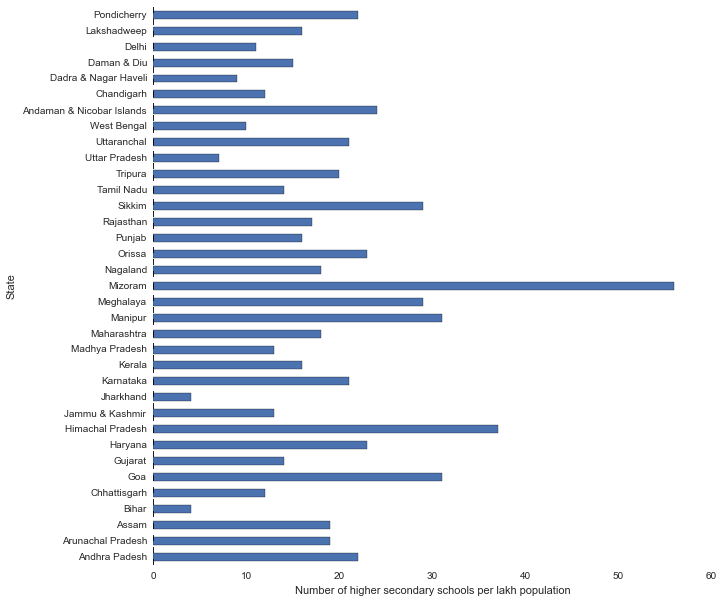

In [62]:
education.sechrsec_schools_per_lakh_population.plot(kind='barh', figsize=(10, 10));
plt.xlabel('Number of higher secondary schools per lakh population');

<h3>On average there are 19 schools per lakh population.</h3>

In [18]:
education.columns

Index([u'population_in_cr_of_total_census_2001', u'population_in_cr_of_614_age_2004', u'literacy_rate', u'gross_enrollment_ratio__classes__iviii', u'dropout_classes_ix', u'pupil_teacher_ratio', u'pupil_teacher_ratio_upper_primary', u'elementary_school_per_lakh_population', u'sechrsec_schools_per_lakh_population', u'tenth_plan_sarva_siksha_abhiyan_expenditure__rs_cr', u'tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total', u'tenth_plan_sarva_siksha_abhiyan_expenditure__per_capita_614_age', u'lakh_of_population_per_institution_university', u'lakh_of_population_per_institution_college', u'lakh_of_population_per_institution_technical'], dtype='object')

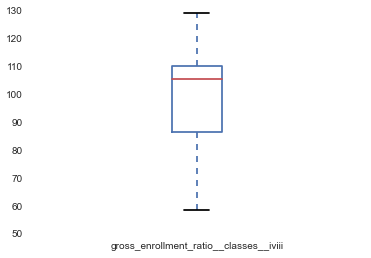

In [44]:
# Gross enrollment ration of children in classes I - VIII
education.boxplot(column='gross_enrollment_ratio__classes__iviii');

In [45]:
education.gross_enrollment_ratio__classes__iviii.describe()

count     35.000000
mean      98.916571
std       18.184103
min       58.750000
25%       87.015000
50%      105.700000
75%      110.540000
max      129.650000
Name: gross_enrollment_ratio__classes__iviii, dtype: float64

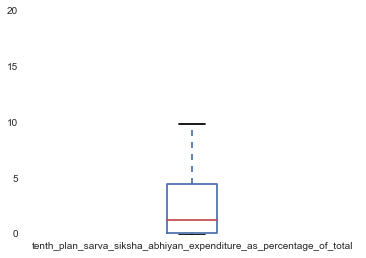

In [46]:
# Tenth Plan Sarva Siksha Abhiyan Expenditure as percentage of total
education.boxplot(column='tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total');

In [47]:
education.tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total.describe()

count    35.000000
mean      2.856857
std       3.887741
min       0.000000
25%       0.175000
50%       1.360000
75%       4.530000
max      19.270000
Name: tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total, dtype: float64

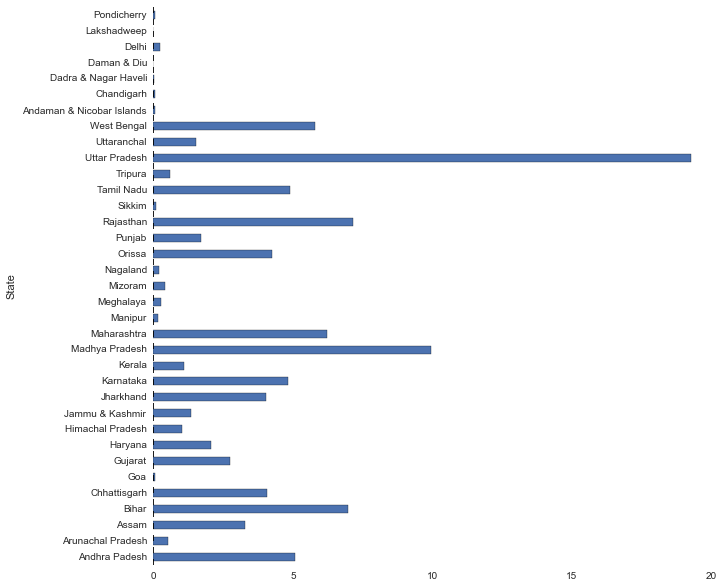

In [48]:
education.tenth_plan_sarva_siksha_abhiyan_expenditure_as_percentage_of_total.plot(kind='barh', figsize=(10, 10));